# Visualisations

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

In [2]:
# Importing dataset
url = 'https://data.ny.gov/resource/wujg-7c2s.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

         transit_timestamp transit_mode station_complex_id  \
0  2022-02-15T06:00:00.000       subway                180   
1  2022-02-15T18:00:00.000       subway                 72   
2  2022-02-15T05:00:00.000       subway                203   
3  2022-02-15T12:00:00.000       subway                126   
4  2022-01-28T11:00:00.000       subway                271   

                    station_complex   borough payment_method  \
0           Kingston-Throop Avs (C)  Brooklyn      metrocard   
1            Fort Hamilton Pkwy (N)  Brooklyn      metrocard   
2  Rockaway Park-Beach 116 St (A,S)    Queens      metrocard   
3                  Jefferson St (L)  Brooklyn      metrocard   
4                 Steinway St (M,R)    Queens      metrocard   

                fare_class_category  ridership  transfers   latitude  \
0  Metrocard - Seniors & Disability        7.0        1.0  40.679920   
1      Metrocard - Unlimited 30-Day       32.0        0.0  40.631386   
2       Metrocard - Unlimi

### Polar chart

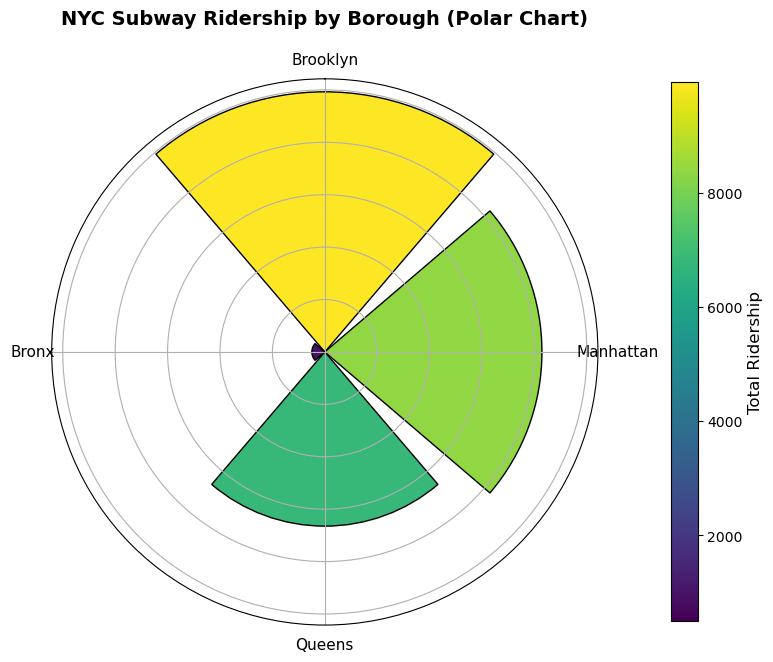

In [10]:
# Clean
df = df.dropna(subset=['borough', 'ridership'])
df = df[df['ridership'] > 0]

# Aggregate borough ridership
borough_usage = df.groupby('borough')['ridership'].sum().reset_index()
borough_usage = borough_usage.sort_values(by='ridership', ascending=False)

# Extract values
labels = borough_usage['borough'].tolist()
values = borough_usage['ridership'].values
normed_values = values / values.max()  # for colormap

# Define angles
angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)
width = 2 * np.pi / len(values)

# Color mapping
colors = plt.cm.viridis(normed_values)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, values, width=width * 0.9, color=colors, edgecolor='black')

# Clock-style layout
ax.set_theta_offset(np.pi / 2)       # Start at top
ax.set_theta_direction(-1)           # Go clockwise
ax.set_yticklabels([])               # Hide radial labels
ax.set_xticks(angles)                # Set ticks
ax.set_xticklabels(labels, fontsize=11)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=mcolors.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Total Ridership', fontsize=12)

# Add title
ax.set_title('NYC Subway Ridership by Borough (Polar Chart)', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Jitterplot

C:\Users\clara\AppData\Local\Temp\ipykernel_26276\3454551153.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='borough', y='ridership',


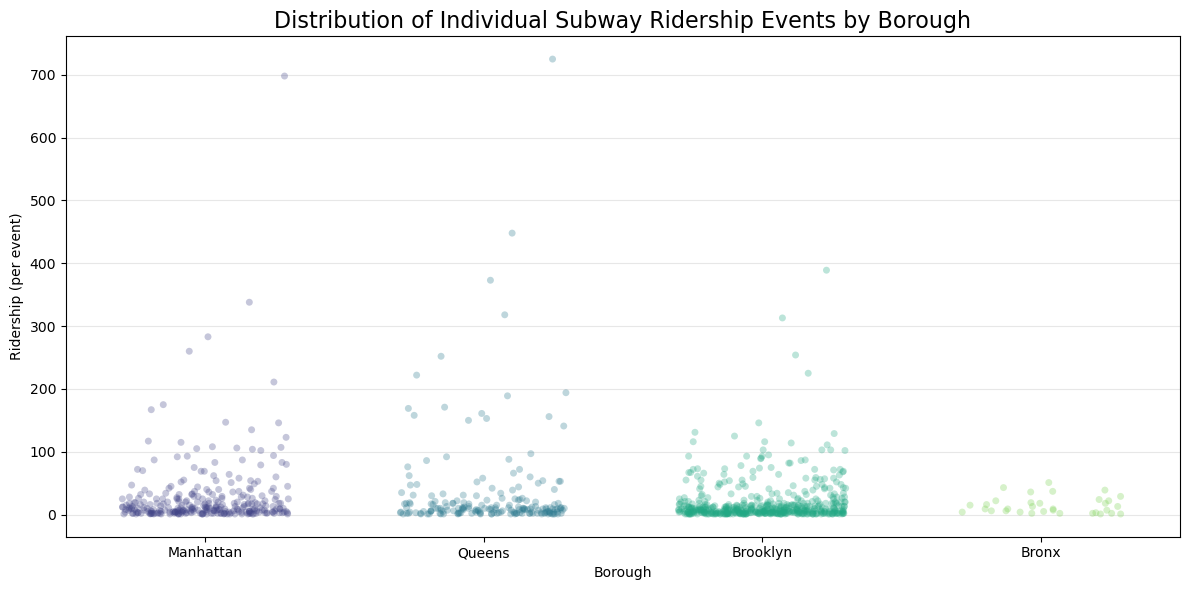

In [11]:
# Clean: drop missing and zero values
df = df.dropna(subset=['borough', 'ridership'])
df = df[df['ridership'] > 0]

# Optional: limit ridership to a reasonable max for visibility
df = df[df['ridership'] < 10000]  # adjust as needed

# Optional: create a weekend flag
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
df['day_of_week'] = df['transit_timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])

# Plot: Basic jitter plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='borough', y='ridership', 
              jitter=0.3, alpha=0.3, palette='viridis')

# Customize
plt.title("Distribution of Individual Subway Ridership Events by Borough", fontsize=16)
plt.ylabel("Ridership (per event)")
plt.xlabel("Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
